In [1]:
import numpy as np
import pandas as pd
import xarray
import matplotlib.pyplot as plt
import seaborn as sns
import skimage as ski

from src.results.experiments import _DateExperimentLoader
from src.plot import orig_vs_transformed as plot_ovt
from src.data_loader import Shifted_Data_Loader

Using TensorFlow backend.


In [3]:
# LGN
# V1
# V2
# V4
# PIT, CIT, AIT
vstream_areas = [
    'LGN',
    'V1',
    'V2',
    'V4',
    'IT',
]
vstream_outputs = [
    10**6,
    3.7*10**7,
    2.9*10**7,
    1.5*10**7,
    10**7,
]
# vstream_h = [
#     10**6,
#     190*10**6,
#     150*10**6,
#     68*10**6,
#     (36+17+16)*10**6,
# ]

vs_df = pd.DataFrame.from_records({
    'area':vstream_areas,
    'output_sz':vstream_outputs,
#     'h_sz':vstream_h
})
vs_df['rel_output_sz'] = vs_df.output_sz/vs_df.output_sz.values.min()
# vs_df['contraction_ratio'] = vs_df.output_sz/vs_df.h_sz
# vs_df['log_contraction_ratio'] = np.log10(vs_df.contraction_ratio.values)
# vs_df['log_h_sz'] = np.log10(vs_df.h_sz)
vs_df['log_output_sz'] = np.log10(vs_df.output_sz)

vs_df.head()

,area,output_sz,rel_output_sz,log_output_sz
0,LGN,1000000.0,1.0,6.000000
1,V1,37000000.0,37.0,7.568202
2,V2,29000000.0,29.0,7.462398
3,V4,15000000.0,15.0,7.176091
4,IT,10000000.0,10.0,7.000000


In [4]:
conv_enc_outputs = [
    56*56,
    56*56*32,
    28*28*64,
    14*14*128,
    7*7*256,
    256,
    70,
]
conv_e_df = pd.DataFrame.from_records({
    'area':vstream_areas,
    'output_sz':conv_enc_outputs,
#     'h_sz':vstream_h
})

ValueError: arrays must all be same length

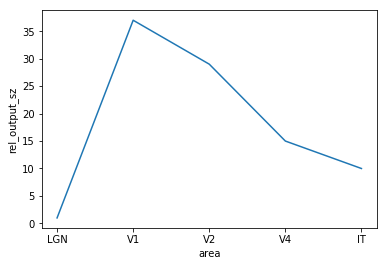

In [6]:
sns.lineplot(x='area',y='rel_output_sz',sort=False,data=vs_df)
# plt.yscale('log')

In [ ]:
n_neurons = np.logspace(2,11.1,50)
avg_n_synapses = np.logspace(1.1,4,50)

In [ ]:
xx,yy = np.meshgrid(n_neurons,avg_n_synapses)

In [ ]:
Z_bits = np.log2(xx)*xx*yy
Z_bytes = Z_bits/4

In [ ]:
sns.set_context('talk')

In [ ]:
import matplotlib.colors as colors
fig,ax = plt.subplots(1,1)
CS = ax.contourf(xx,yy,Z_bytes,50,cmap='plasma',
#                   norm=colors.LogNorm(vmin=Z_bytes.min(), vmax=Z_bytes.max(),),
#                   vmin=5*(10**4),
#                   vmax=5*(10**6),
                  norm=colors.LogNorm(vmin=Z_bytes.min(), vmax=2*(10**6)),

                 )
ax.autoscale(False)
n_animal = np.array([302,10**7,10**11])
tot_syn_animal = np.array([7000,8.1*(10**10),1*(10**14)])
ax.scatter(n_animal,tot_syn_animal/n_animal,zorder=1)
plt.colorbar(CS)
ax.set_ylabel('Avg Synapses/neuron')
ax.set_xlabel('Neurons')
# ax.set_yscale('log')
ax.set_xscale('log')

In [ ]:
n_neurons = np.logspace(2,11.1,50)
avg_n_synapses = np.linspace(10,2000,50)
for s in avg_n_synapses:
    z = np.log2(n_neurons)*n_neurons*s
    sns.lineplot(n_neurons,z)

plt.xscale('log')
plt.yscale('log')